# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [153]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

In [154]:
X,y  = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers 

In [155]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

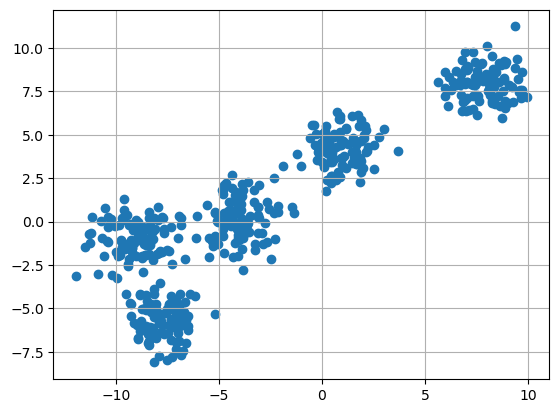

In [156]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

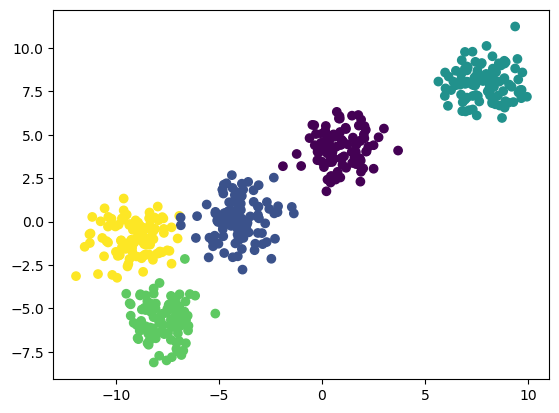

In [157]:
#y is just to check for accuracy
plt.scatter(X[:,0],X[:,1],c=y)

In [158]:
k = 5  #num of clustures

color  = ["green","red","blue","yellow","orange"]

clusters = {}

#initialising random centre for each clusture

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)             #generate a point within [10,10]
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster




In [159]:
#center = 10*(2*np.random.random((X.shape[1],))-1)
#print(center)

In [160]:
clusters

{0: {'center': array([-6.65494465, -2.72557937]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-6.17349353,  3.85653094]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-4.67628671,  2.58328963]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 1.95538074, -3.14217985]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([1.62312126, 2.01000062]),
  'points': [],
  'color': 'orange'}}

In [161]:
#Eucledian distance calculation
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [162]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
   
    

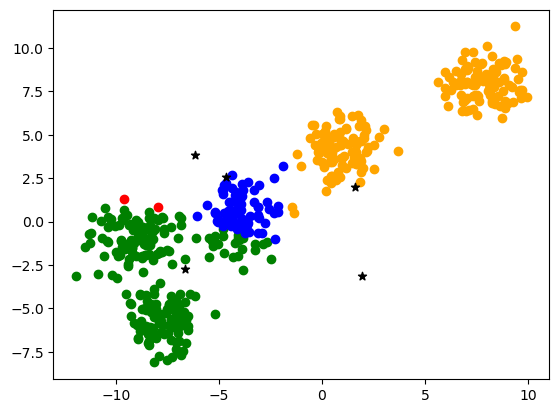

In [163]:
assignPointToClusters(clusters)
plotClusters(clusters)

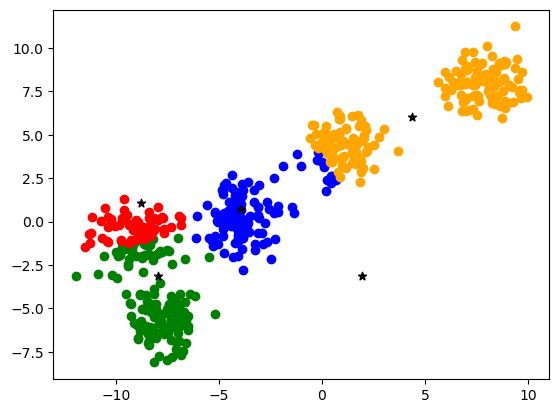

In [164]:
# Repeat this cell few times or put it inside a loop
updateClusters(clusters)
assignPointToClusters(clusters)
plotClusters(clusters)


# Output is not good due to random initialization, to improve initialization we use K-means++